# <u><font color='purple'> Technocolab Intership Project : Classify Song Genre Audio Data</font></u>

## <font color = 'red'>Importing Dataset & Descriptive Analysis:</font>

In this part we will import the required libraries. After this we will import the 'fma-rock-vs-hiphip.csv' and 'echonestmetrics .json' files. Then we will understand some insights about the both the datasets in the descriptive analysis part.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
%matplotlib inline

In [36]:
data_df = pd.read_csv('fma-rock-vs-hiphop.csv')

In [37]:
data_df.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,26-11-2008 01:43,26-11-2008 00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,26-11-2008 01:43,26-11-2008 00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,26-11-2008 01:44,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,26-11-2008 01:44,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,26-11-2008 01:45,26-11-2008 00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [38]:
data_df.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [40]:
data_df.shape

(17734, 21)

In [41]:
data_df.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [42]:
file_name = "echonest-metrics.json"
with open(file_name, 'r') as f:
    document =  json.loads(f.read())
C_df = pd.DataFrame(document)
C_df.tail()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274
13128,124911,0.993606,0.499339,0.050622,0.945677,0.095965,0.065189,119.965,0.204652


In [43]:
C_df.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [44]:
C_df.shape

(13129, 9)

In [45]:
C_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0+ MB


From above outputs, we observe that in the dataset of 'fma-rock-vs-hiphop.csv' there are total 17,734 observations corresponding to the 21 variables. Data type of variables is either 'int64' or 'object'. Also there is no missing value in the C_df hence no need to clean it. So, in next part we will clean the data_df and merge it with the C_df.

## <font color = 'red'>Cleaning & Preparation of Dataset:</font>

In this part we will analysis the 'fma-rock-vs-hiphip.csv' and 'echonestmetrics .json' files. We will find the missing values in 'fma-rock-vs-hiphip.csv' and 'echonestmetrics .json' files (if any) and try to impliment the best practice to deal with them.

In [46]:
data_df.isna().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

From above output it is clear that the variables 'composer', 'date_recorded', 'information', 'language_code', 'lyricist', 'publisher' have more then 15,000 missing values hence it doesn't make any sense to include these variables for the further data analysis. Also there are few other columns which are not important for our analysis hence we will drop these variables.

In [47]:
A_df = data_df[['track_id', 'bit_rate','duration', 'genre_top', 'genres', 'genres_all', 'interest', 'listens']]

In [48]:
A_df.head()

,track_id,bit_rate,duration,genre_top,genres,genres_all,interest,listens
0,135,256000,837,Rock,"[45, 58]","[58, 12, 45]",2484,1832
1,136,256000,509,Rock,"[45, 58]","[58, 12, 45]",1948,1498
2,151,192000,192,Rock,[25],"[25, 12]",701,148
3,152,192000,193,Rock,[25],"[25, 12]",637,98
4,153,256000,405,Rock,[26],"[26, 12]",354,424


So, final dataset contains variables namely 'track_id', 'bit_rate','duration', 'genre_top', 'genres', 'genres_all', 'interest', 'listens'. As our dependent varible for the regression analysis is 'genre_top' which is a categorical variable so we will convert this variable to numeric by assigning numeric values to the categories of the 'genre_top'. To do so, we will use replace method with the help so the dict.

In [49]:
A_df['genre_top'].unique()

array(['Rock', 'Hip-Hop'], dtype=object)

In [50]:
replace_genre = {'genre_top': {'Rock': 0, 'Hip-Hop' : 1}}
B_df = A_df.replace(replace_genre)
B_df.head()

,track_id,bit_rate,duration,genre_top,genres,genres_all,interest,listens
0,135,256000,837,0,"[45, 58]","[58, 12, 45]",2484,1832
1,136,256000,509,0,"[45, 58]","[58, 12, 45]",1948,1498
2,151,192000,192,0,[25],"[25, 12]",701,148
3,152,192000,193,0,[25],"[25, 12]",637,98
4,153,256000,405,0,[26],"[26, 12]",354,424


In [51]:
C_df.isna().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [52]:
result_df = pd.merge(B_df, C_df, on='track_id')
result_df.head()

,track_id,bit_rate,duration,genre_top,genres,genres_all,interest,listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,256000,405,0,[26],"[26, 12]",354,424,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,256000,319,0,[26],"[26, 12]",242,205,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,192000,756,0,[26],"[26, 12]",268,197,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,192000,144,0,[25],"[25, 12]",815,270,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,192000,181,0,[25],"[25, 12]",468,122,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


So, clearly our dataset is prepared for the analysis and visualization part.

## <font color = 'red'>Visualization Ananlysis of Final Dataset:</font>

In this part will know more insights about given 'fma-rock-vs-hiphip.csv' and 'echonestmetrics .json' files. and try to establish relationships between variable (in any). We mainly use scatterplot and lineplot from the seaborn library.

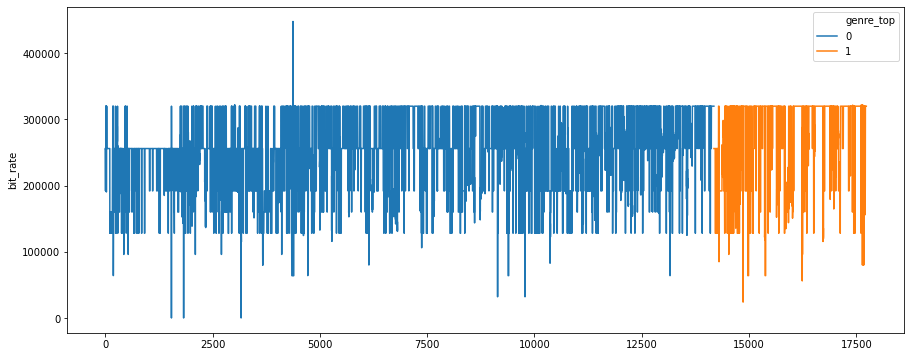

In [53]:
plt.figure(figsize=(15,6))
sns.lineplot(x=B_df.index, y=B_df['bit_rate'], hue=B_df['genre_top']);

There is no difference between genre 'rock' and 'hiphop' on the basis of 'bit rate' as both genre have same range of values for bit rate except some outplier.

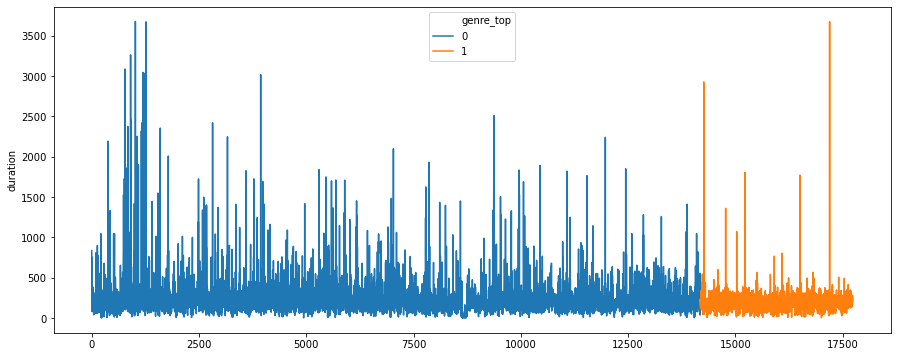

In [54]:
plt.figure(figsize=(15,6))
sns.lineplot(x=B_df.index, y=B_df['duration'], hue=B_df['genre_top']);

So, clearly from above graph duration for the songs having genre 'rock' is slightly greater than the duration for the songs having genre 'hiphop'.

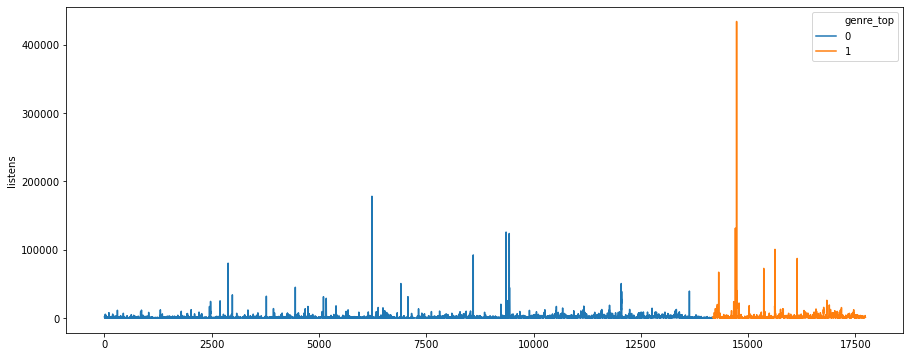

In [55]:
plt.figure(figsize=(15,6))
sns.lineplot(x=B_df.index, y=B_df['listens'], hue=B_df['genre_top']);

Number of listens for both the genres are approximately equal except some of the outliers.

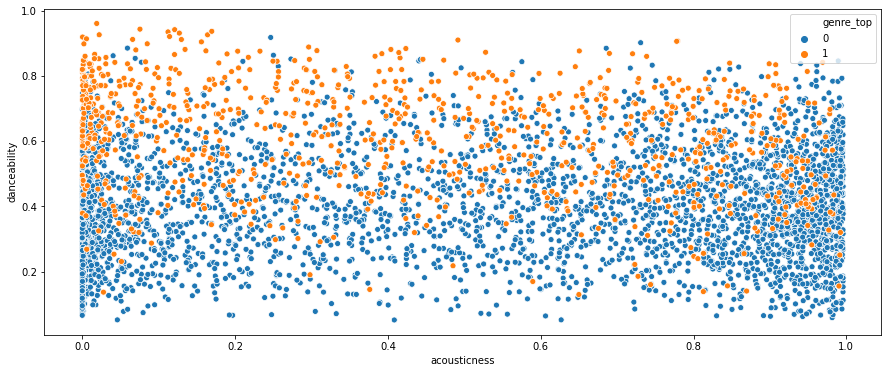

In [56]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=result_df['acousticness'], y=result_df['danceability'], hue=result_df['genre_top']);

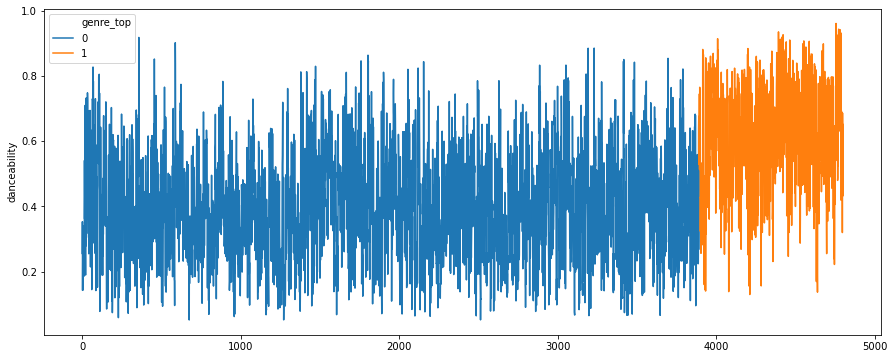

In [57]:
plt.figure(figsize=(15,6))
sns.lineplot(x=result_df.index, y=result_df['danceability'], hue=result_df['genre_top']);

Clearly, from the above graph we observe that 'hiphop songs' have higher 'danceability' as compared to the 'rock songs'.

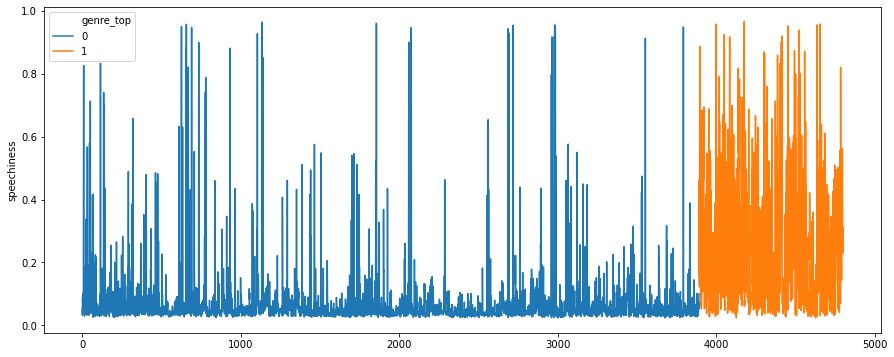

In [58]:
plt.figure(figsize=(15,6))
sns.lineplot(x=result_df.index, y=result_df['speechiness'], hue=result_df['genre_top']);

'Speechiness' is also on an average higher in the 'hiphop songs' as compared to the 'rock songs'

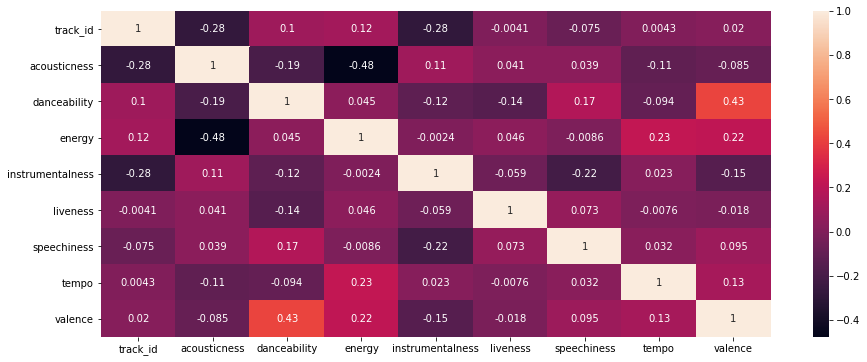

In [59]:
Corr_Matrix = C_df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(Corr_Matrix, annot = True);

From above heatmap it is obvious that properties have very less correlation between them except a few cases like (valence & danceability) etc. Hence from heatmap we didn't able to remove the extra properties because of this reason we will go for the PCA i.e. 'principal component analysis'.

## <font color = 'red'>ML Models Analysis:</font>

In [69]:
model_df = result_df[['track_id', 'genre_top', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']]
model_df.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,0,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,0,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,0,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,0,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,0,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
dep_df = model_df.genre_top
ind_df = model_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']]
X_train, X_test, Y_train, Y_test = train_test_split(ind_df, dep_df, test_size=0.2, random_state = 0)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)
print("Coeffient of Logistic Regression model are : ", model.coef_)
print("Intercept of Logistic Regression model is : ", model.intercept_)

Coeffient of Logistic Regression model are :  [[-1.18421615e+00  5.95820930e+00 -4.98705861e-01 -7.31658338e-01
   4.61853771e-01  5.91718177e+00 -3.79393590e-03  6.28810840e-01]]
Intercept of Logistic Regression model is :  [-3.95713541]


In [71]:
psh = np.array([0.988306, 0.255661, 0.979774, 0.973006, 0.121342, 0.051740, 90.241, 0.034018]).reshape(1,-1)
model.predict_prob(psh)

AttributeError: 'LogisticRegression' object has no attribute 'predict_prob'

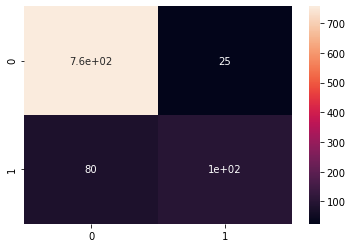

In [63]:
Y_pred_Logreg = model.predict(X_test)
confusion_matrix_logreg = confusion_matrix(Y_test, Y_pred_Logreg)
sns.heatmap(confusion_matrix_logreg, annot = True);

In [64]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)*100))

Accuracy of logistic regression classifier on test set: 89.07


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred_df = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_pred_df))
print(classification_report(Y_test, Y_pred_df))

[[717  64]
 [ 50 130]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       781
           1       0.67      0.72      0.70       180

    accuracy                           0.88       961
   macro avg       0.80      0.82      0.81       961
weighted avg       0.89      0.88      0.88       961



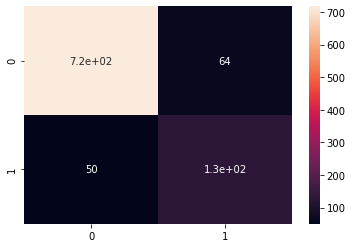

In [51]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_df)
sns.heatmap(confusion_matrix_dt, annot = True);

In [52]:
classifier.score(X_test, Y_test)
print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)*100))

Accuracy of DecisionTree classifier on test set: 88.14


## <font color = 'red'> ML Model Analysis with PCA:</font>

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)

Above code is for standardizing the train dataset.

In [54]:
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(X_std_train)
print(pca.n_components_)
X_pca_train = pca.transform(X_std_train)
X_pca_test = pca.transform(X_std_test)

7


Above output shows that 90 % of variance in the train dataset is explained by the 9 principle components.

In [55]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_pca_train, Y_train)
print('Accuracy of logistic regression classifier on test set after the PCA: {:.2f}'.
      format(logisticRegr.score(X_pca_test, Y_test)*100))

Accuracy of logistic regression classifier on test set after the PCA: 88.66


In [56]:
logisticRegr.fit(X_std_train, Y_train)
logisticRegr.score(X_std_test, Y_test)
print('Accuracy of logistic regression classifier on test set after the standardization: {:.2f}'.
      format(logisticRegr.score(X_std_test, Y_test)*100))

Accuracy of logistic regression classifier on test set after the standardization: 89.28


In [57]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_pca_train, Y_train)
print('Accuracy of DecisionTree classifier on test set after the PCA: {:.2f}'.
      format(DTclassifier.score(X_pca_test, Y_test)*100))

Accuracy of DecisionTree classifier on test set after the PCA: 85.74


In [58]:
DTclassifier.fit(X_std_train, Y_train)
print('Accuracy of DecisionTree classifier on test set after the standardization: {:.2f}'.
      format(DTclassifier.score(X_std_test, Y_test)*100))

Accuracy of DecisionTree classifier on test set after the standardization: 88.35


## <font color = 'red'> Conclusions:</font>

On merging the two datasets 'fma-rock-vs-hiphip.csv' and 'echonestmetrics .json' we get final dataset having 4802 observations. On the basis of visualisation analysis, we can conlcude that:
> **There is no difference between genre 'rock' and 'hiphop' on the basis of 'bit rate' as both genre have same range of values for bit rate except some outplier. <br>
> Duration for the songs having genre 'rock' is slightly greater than the duration for the songs having genre 'hiphop'. <br>
> Number of listens for both the genres are approximately equal except some of the outliers. <br>
> 'Hiphop songs' have higher 'danceability' as compared to the 'rock songs'. <br>
> 'Speechiness' is also on an average higher in the 'hiphop songs' as compared to the 'rock songs'.** <br>

From ML Model Analysis we obtained the following conclusions for the accuracy of models:
> **Accuracy of logistic regression classifier on test set : 89.07% <br>
> Accuracy of logistic regression classifier on test set after the standardization : 89.28% <br>
> Accuracy of logistic regression classifier on test set after the PCA (with standardization) : 88.66% <br>
> Accuracy of DecisionTree classifier on test set : 89.39% <br>
> Accuracy of DecisionTree classifier on test set after the standardization : 88.87% <br>
> Accuracy of DecisionTree classifier on test set after the PCA (with standardization) : 86.26% <br>**

*Note: Number of Principal Components considered = 7 which explains 90 % of variance of train dataset.*

***So, Clearly Logistic and DecisionTree algorithms have approximately same accuracy. Due to the simplicity of Logistic Regression, we will use Logistic Regression algorithm in deployment.***